# Logistic Model

# Load Pacakage.

In [1]:
import re
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import plotly.express as px
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load data

In [2]:
file=os.path.dirname(os.getcwd())
Clean_DF = pd.read_csv(file+'\\data\\Steam_Clean_Data.csv')
Train_reco = pd.read_csv(file+'\\data\\Train_reco.csv')
Test_reco = pd.read_csv(file+'\\data\\Test_reco.csv')
Train_auth = pd.read_csv(file+'\\data\\Train_auth.csv')
Test_auth = pd.read_csv(file+'\\data\\Test_auth.csv')

## Transform Recomendation Data.

Use tfidvectorizer to transform text data

In [3]:
Tfidf_reco=TfidfVectorizer(
    input="content",
    lowercase=True, 
    stop_words = "english",max_features = 1000)
Train_DTM_reco = Tfidf_reco.fit_transform(Train_reco['review'])
Test_DTM_reco = Tfidf_reco.transform(Test_reco['review'])

Convert tfidvectorizer result to pandas data frame.

In [4]:
Train_DTM_DF_reco=pd.DataFrame(Train_DTM_reco.toarray(),columns=Tfidf_reco.get_feature_names())
Test_DTM_DF_reco=pd.DataFrame(Test_DTM_reco.toarray(),columns=Tfidf_reco.get_feature_names())

## Recommendation Model

Set an instantiate logistic model

In [5]:
## Instantiate
log_reco=LogisticRegression(random_state=5)


Use trran data to fit the model.

In [6]:
log_reco.fit(Train_DTM_DF_reco, Train_reco['recommendation'])

LogisticRegression(random_state=5)

Predict the test data

In [7]:
DT_pred_reco=log_reco.predict(Test_DTM_DF_reco)

Create a confusion matrix


The confusion matrix is:
[[19211  8410]
 [ 5176 51019]]


0.8379068435620883

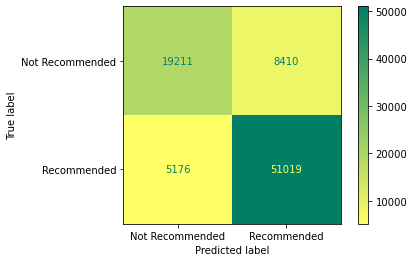

In [8]:
bn_matrix = confusion_matrix(Test_reco['recommendation'], DT_pred_reco)
print("\nThe confusion matrix is:")
print(bn_matrix)
plot_confusion_matrix(log_reco, Test_DTM_DF_reco, Test_reco['recommendation'], cmap = 'summer_r')
accuracy_score(Test_reco['recommendation'], DT_pred_reco)

## Transform Authentic Data.

Use tfidvectorizer to transform text data

In [9]:
Tfidf_auth=TfidfVectorizer(
    input="content",
    lowercase=True, 
    stop_words = "english",max_features = 1000)
Train_DTM_auth = Tfidf_auth.fit_transform(Train_auth['review'])


Convert tfidvectorizer result to pandas data frame.

In [ ]:
Train_DTM_DF_auth=pd.DataFrame(Train_DTM_auth.toarray(),columns=Tfidf_auth.get_feature_names())
Test_DTM_auth = Tfidf_auth.transform(Test_auth['review'])
Test_DTM_DF_auth=pd.DataFrame(Test_DTM_auth.toarray(),columns=Tfidf_auth.get_feature_names())

## Authentic Model

Set an instantiate logistc model

In [10]:
## Instantiate
log_auth=LogisticRegression(random_state=0)



C:\Users\25465\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Use train data fit model.

In [ ]:
log_auth.fit(Train_DTM_DF_auth, Train_auth['authentic'])

Predict label for test data.

In [11]:

DT_pred_auth=log_auth.predict(Test_DTM_DF_auth)

Create a confusion matrix


The confusion matrix is:
[[48708  4511]
 [24882  5715]]


0.6493151665553116

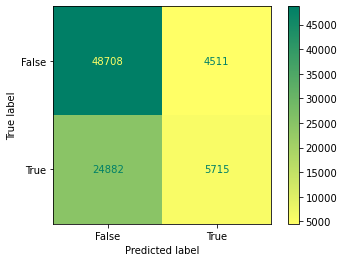

In [12]:
bn_matrix = confusion_matrix(Test_auth['authentic'], DT_pred_auth)
print("\nThe confusion matrix is:")
print(bn_matrix)
plot_confusion_matrix(log_auth, Test_DTM_DF_auth, Test_auth['authentic'], cmap = 'summer_r')
#plt.savefig('MyTree1_cm.png')
accuracy_score(Test_auth['authentic'], DT_pred_auth)

Create a new logistic Model.

In [13]:

log_auth2=LogisticRegression(random_state=10,solver='liblinear')
log_auth2.fit(Train_DTM_DF_auth, Train_auth['authentic'])
DT_pred_auth=log_auth2.predict(Test_DTM_DF_auth)


The confusion matrix is:
[[48719  4500]
 [24880  5717]]


0.6494702682065476

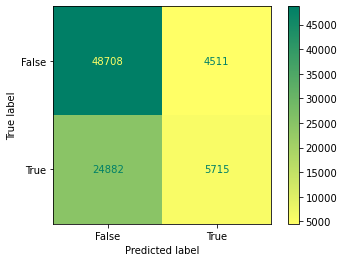

In [14]:
bn_matrix = confusion_matrix(Test_auth['authentic'], DT_pred_auth)
print("\nThe confusion matrix is:")
print(bn_matrix)
plot_confusion_matrix(log_auth, Test_DTM_DF_auth, Test_auth['authentic'], cmap = 'summer_r')
#plt.savefig('MyTree1_cm.png')
accuracy_score(Test_auth['authentic'], DT_pred_auth)

Use cross valiadation to generate logistic model.

In [15]:
from sklearn.linear_model import LogisticRegressionCV
log_auth3 = LogisticRegressionCV(cv=10, random_state=0)
log_auth3.fit(Train_DTM_DF_auth, Train_auth['authentic'])
DT_pred_auth3=log_auth3.predict(Test_DTM_DF_auth)

C:\Users\25465\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\25465\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Create a confusion matrix.


The confusion matrix is:
[[48719  4500]
 [24880  5717]]


0.6495657153765391

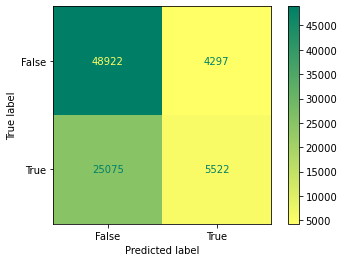

In [16]:
bn_matrix = confusion_matrix(Test_auth['authentic'], DT_pred_auth)
print("\nThe confusion matrix is:")
print(bn_matrix)
plot_confusion_matrix(log_auth3, Test_DTM_DF_auth, Test_auth['authentic'], cmap = 'summer_r')
#plt.savefig('MyTree1_cm.png')
accuracy_score(Test_auth['authentic'], DT_pred_auth3)